## Model v0.1

In [39]:
# Library Import
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# import the train test split
from sklearn.model_selection import train_test_split

In [40]:
# List to store results
# Stores the performance on test set.
model_results = []
#  Stores the name of model
model_name = []

In [41]:
# Get current working directory
cwd = os.getcwd()
print(cwd)

/Users/Shantanu/Downloads


In [42]:
# Uses the input file generated from preprocessing
input_file ='input_model_weighted_average.csv'

input_data = pd.read_csv(input_file)

# Making all column names UPPER CASE --> inline with the weather data file
input_data.columns = map(str.upper, input_data.columns)


# rename UNNAMED:0 to INDEX
#input_data.rename(columns={'UNNAMED: 0': 'INDEX'}, inplace=True)

# drop UNNAMED:0.1
#input_data = input_data.drop('UNNAMED: 0.1', axis=1)

input_data.head()

# List of column names
col_names = list(input_data)


p_update = pd.read_csv('IL_Corn_Price_Updated_1986_2016.csv')
p_update['Period'] = pd.Categorical(p_update['Period'], ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])

#ps
#Risk-free rate for 1986 - 2016 : 9.34% ( 30-year Treasury Constant Maturity Rate at 1986 )
# Monthly discount rate = 1/1.000248 

p_update = p_update[['Year', 'Period','Value']]
price_updated = p_update.dropna(axis=0, how='any')
#price_updated = p_update[p_update.Period != 'MARKETING YEAR']

price_updated = price_updated.sort_values(['Year', 'Period'])
price_updated = price_updated.reset_index(drop=True)
#price_updated.iloc[168:174]

price_updated = price_updated[~((price_updated.Year == 2000) & ((price_updated.Period == 'MAR') | (price_updated.Period == 'APR')))]
price_updated = price_updated.reset_index(drop=True)
price_updated.iloc[168:172]
# List all column types
#input_data.dtypes

,Year,Period,Value
168,2000,JAN,1.97
169,2000,FEB,2.03
170,2000,MAY,2.20
171,2000,JUN,1.89


In [43]:
len(price_updated)

370

In [44]:
# Preprocessing

print("Shape of Original data: {}".format(input_data.shape) + "\n")

input_variables = input_data.iloc[:,3:]
print("Variables: " + str(input_variables.columns) + "\n")
print("Shape of variable data: {}".format(input_variables.shape) + "\n")

# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# input_variables = sc.fit_transform(input_variables)

price = price_updated["Value"]

Shape of Original data: (370, 25)

Variables: Index(['TMP_HIGH', 'TMP_AVG', 'TMP_LOW', 'DP_HIGH', 'DP_AVG', 'DP_LOW',
       'HUM_HIGH', 'HUM_AVG', 'HUM_LOW', 'SEALVL_HIGH', 'SEALVL_AVG',
       'SEALVL_LOW', 'VIS_HIGH', 'VIS_AVG', 'VIS_LOW', 'WIND_HIGH', 'WIND_AVG',
       'PRECIP', 'NUMDAY_RAIN', 'NUM_DAYS_SNOW', 'NUM_DAYS_FOG',
       'NUM_DAYS_THNDRSTRM'],
      dtype='object')

Shape of variable data: (370, 22)



In [45]:
print(input_data.columns)

Index(['UNNAMED: 0', 'YEAR', 'MONTH', 'TMP_HIGH', 'TMP_AVG', 'TMP_LOW',
       'DP_HIGH', 'DP_AVG', 'DP_LOW', 'HUM_HIGH', 'HUM_AVG', 'HUM_LOW',
       'SEALVL_HIGH', 'SEALVL_AVG', 'SEALVL_LOW', 'VIS_HIGH', 'VIS_AVG',
       'VIS_LOW', 'WIND_HIGH', 'WIND_AVG', 'PRECIP', 'NUMDAY_RAIN',
       'NUM_DAYS_SNOW', 'NUM_DAYS_FOG', 'NUM_DAYS_THNDRSTRM'],
      dtype='object')


In [46]:
# Splitting Data into Training and Test
X_train, X_test, y_train, y_test = train_test_split(input_variables, price, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(296, 22) (296,)
(74, 22) (74,)


## Multiple Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)

print("Accuracy of MLR: %f" %accuracies.mean())
print ("SD of accuracy: %f" %accuracies.std())
model_results.append(accuracies.mean())
model_name.append("MLR")

Accuracy of MLR: 0.270347
SD of accuracy: 0.253482


## Ridge Regression

In [48]:
from sklearn.linear_model import Ridge
regressor = Ridge()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)

print("Accuracy of Ridge: %f" %accuracies.mean())
print ("SD of accuracy: %f" %accuracies.std())
model_results.append(accuracies.mean())
model_name.append("Ridge")

Accuracy of Ridge: 0.277047
SD of accuracy: 0.248156


In [49]:
# Try with some handpicked alpha values
# Note: Higher alpha decerease training test performance but increases generalization

from sklearn.linear_model import Ridge
regressor = Ridge(alpha = 0.1)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)

print("Accuracy of Ridge_0.1: %f" %accuracies.mean())
print ("SD of accuracy: %f" %accuracies.std())
model_results.append(accuracies.mean())
model_name.append("Ridge_0.1")


from sklearn.linear_model import Ridge
regressor = Ridge(alpha = 10)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)

print("Accuracy of Ridge_10: %f" %accuracies.mean())
print ("SD of accuracy: %f" %accuracies.std())
model_results.append(accuracies.mean())
model_name.append("Ridge_10")



Accuracy of Ridge_0.1: 0.272034
SD of accuracy: 0.251884
Accuracy of Ridge_10: 0.284879
SD of accuracy: 0.243793


## Lasso Regression

In [50]:
# we have large number of features and only a few of them looked important
from sklearn.linear_model import Lasso
regressor = Lasso()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)

print("Accuracy of Lasso: %f" %accuracies.mean())
print ("SD of accuracy: %f" %accuracies.std())
model_results.append(accuracies.mean())
model_name.append("Lasso")

Accuracy of Lasso: 0.141804
SD of accuracy: 0.111947


In [51]:
# Setting alpha too low will remove the effect of regularization

from sklearn.linear_model import Lasso
regressor = Lasso(alpha=0.0001, max_iter=100000)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)

print("Accuracy of Lasso_0.0001: %f" %accuracies.mean())
print ("SD of accuracy: %f" %accuracies.std())
model_results.append(accuracies.mean())
model_name.append("Lasso_0.0001")



Accuracy of Lasso_0.0001: 0.271490
SD of accuracy: 0.252566


## Elastic Net

In [52]:
from sklearn.linear_model import ElasticNet
regressor = ElasticNet(alpha=0.1, l1_ratio=0.7,max_iter = 100000)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)

print("Accuracy of Elastic Net: %f" %accuracies.mean())
print ("SD of accuracy: %f" %accuracies.std())
model_results.append(accuracies.mean())
model_name.append("Elastic_Net")



Accuracy of Elastic Net: 0.283128
SD of accuracy: 0.205052


## Decision Tree

In [53]:
# Fitting Decision Tree Regression to the dataset

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)

print("Accuracy of Decision Tree: %f" %accuracies.mean())
print ("SD of accuracy: %f" %accuracies.std())
model_results.append(accuracies.mean())
model_name.append("DT")


Accuracy of Decision Tree: 0.266842
SD of accuracy: 0.239161


## Random Forest

In [54]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)

print("Accuracy of Random Forest 10: %f" %accuracies.mean())
print ("SD of accuracy: %f" %accuracies.std())
model_results.append(accuracies.mean())
model_name.append("RF_10")

Accuracy of Random Forest 10: 0.559432
SD of accuracy: 0.107253


In [55]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)

print("Accuracy of Random Forest 100: %f" %accuracies.mean())
print ("SD of accuracy: %f" %accuracies.std())
model_results.append(accuracies.mean())
model_name.append("RF_100")

Accuracy of Random Forest 100: 0.567849
SD of accuracy: 0.082376


In [56]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)

print("Accuracy of Random Forest 300: %f" %accuracies.mean())
print ("SD of accuracy: %f" %accuracies.std())
model_results.append(accuracies.mean())
model_name.append("RF_300")

Accuracy of Random Forest 300: 0.569243
SD of accuracy: 0.077571


### Plot Results of regression models

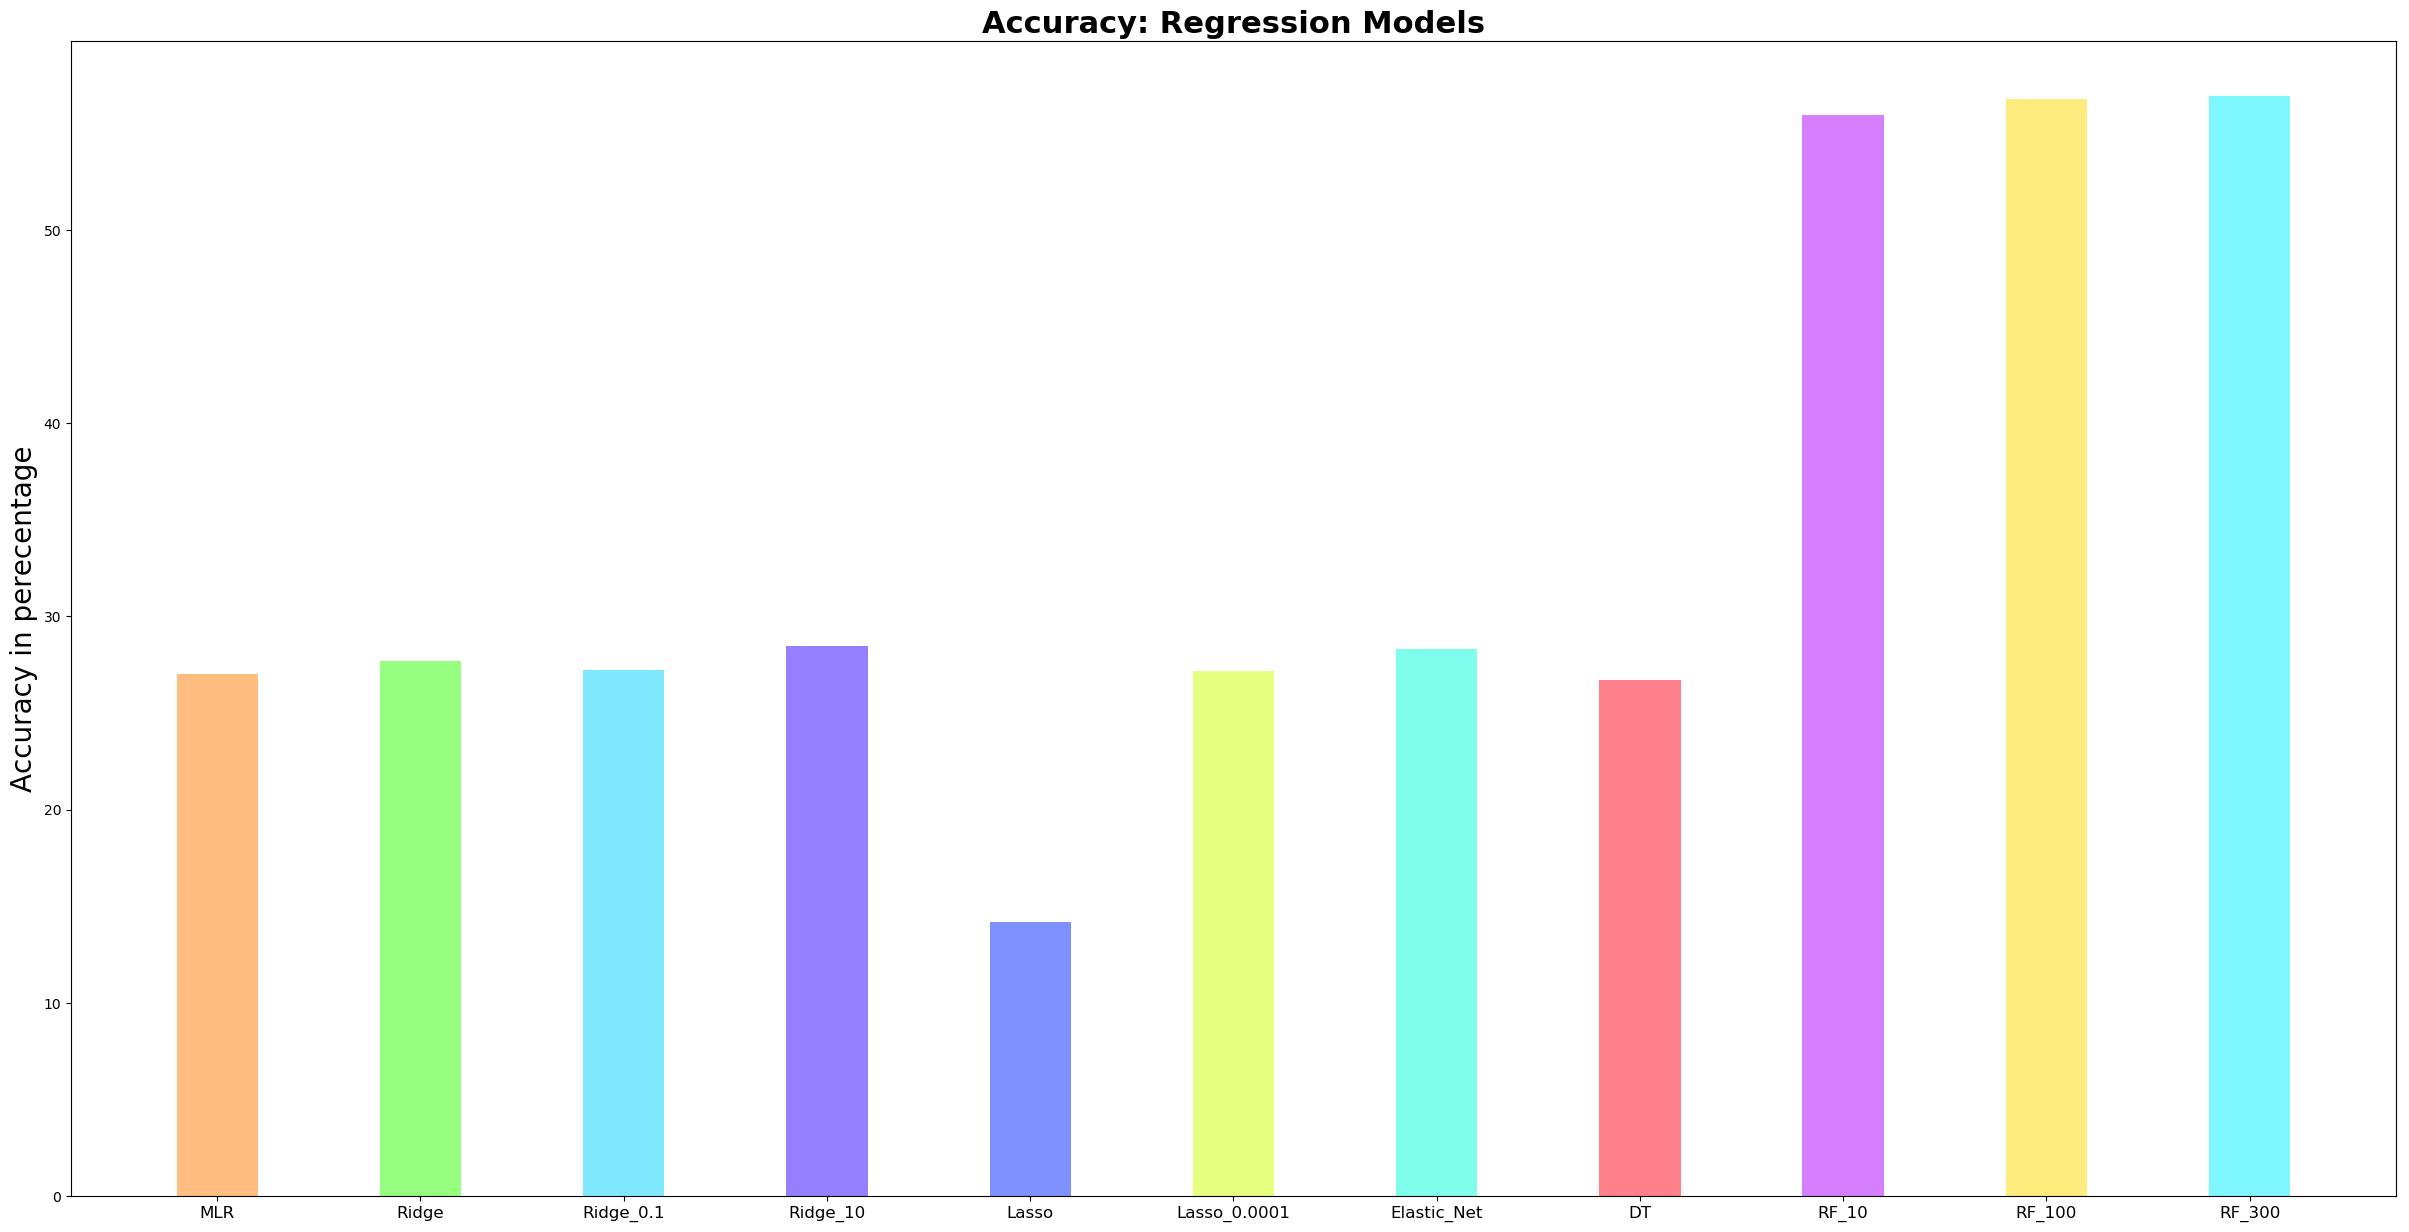

In [57]:
from matplotlib import cm
import random

# Give each bar separate color
color_code_vector = random.sample(range(1, 100), len(model_name))
reg_color_code_vector = map(lambda x: x/max(color_code_vector), color_code_vector)
reg_color_code_vector = list(reg_color_code_vector)
reg_color_code_vector
colors = cm.hsv(reg_color_code_vector)

# Expressing accuracy in percentage
model_results_percentage = list(map(lambda x: x*100, model_results))

y_pos = np.arange(len(model_name))

plt.rcdefaults() # white background, gets rid of gray
plt.figure(figsize = (30,15))
plt.bar(y_pos, model_results_percentage, align='center', alpha=0.5, width=0.4, color = colors)
plt.xticks(y_pos, model_name, fontsize = 12)
plt.ylabel('Accuracy in perecentage', fontsize=20)
plt.title('Accuracy: Regression Models', fontsize=22, fontweight='bold')
plt.show()